In [1]:
# Importing the Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the Datasets
Customer = pd.read_csv("C://projects/data/input/Customer Acqusition.csv")
Spend =  pd.read_csv("C://projects/data/input/spend.csv")
Repays = pd.read_csv("C://projects/data/input/Repayment.csv")

In [5]:
Customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [7]:
Spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [9]:
Repays.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [11]:
# Conducting the Exploratory Data Analysis

In [13]:
Customer.shape

(100, 8)

In [15]:
Customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [17]:
Repays.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [19]:
Spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [21]:
# Checking for null values 
Customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [23]:
Spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [25]:
Repays.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [29]:
# dropping the column
Repays.drop(columns = ['Unnamed: 4'],inplace = True)

In [31]:
Repays.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [39]:
# now check for null values
Repays.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [35]:
# Dropping the null values
Repays.dropna(inplace = True)

In [37]:
Repays.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [41]:
# 1. In case age is less than 18, replace it with m age values

In [43]:
# now calcualte the mean of age values, which is present in Customer Table
mean = Customer['Age'].mean()
mean

46.49

In [45]:
Customer.loc[(Customer['Age'] < 18),'Age'] = mean

C:\Users\hp\AppData\Local\Temp\ipykernel_25092\2750908954.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '46.49' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Customer.loc[(Customer['Age'] < 18),'Age'] = mean


In [47]:
# checking for records, where the Age in less than 18

In [49]:
Customer.loc[(Customer['Age'] < 18),'Age']

Series([], Name: Age, dtype: float64)

In [51]:
# 1(b).  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#    (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [53]:
# for this we need to get two table which are spend & customer table
# and we will merge these  two tables for getting required results

In [55]:
cust_spend = pd.merge(Customer,Spend,
                      on = ['Customer','Customer'],
                      how = 'inner')

In [57]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [59]:
cust_spend.head()
print(cust_spend.shape)

(1500, 12)


In [61]:
# getttin records, whose Spend amount is greater than Limit 
cust_spend.loc[(cust_spend['Amount'] > cust_spend['Limit'])]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [63]:
cust_spend.loc[(cust_spend['Amount'] > cust_spend['Limit']),'Amount'] = (0.5 * cust_spend['Limit'])

In [65]:
cust_spend.loc[(cust_spend['Amount'] > cust_spend['Limit']),'Amount']

Series([], Name: Amount, dtype: float64)

In [67]:
#  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [69]:
# now we need to join the two tables which are repay and customer
Repay_cust = pd.merge(Repays,Customer,
                      on = ['Customer','Customer'],
                      how = 'inner')

In [71]:
Repay_cust

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [73]:
Repay_cust.loc[(Repay_cust['Amount'] > Repay_cust['Limit'])]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
17,8.0,A8,5-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,110.0,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,124.0,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,138.0,A8,9-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,152.0,A8,8-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1493,259.0,A7,6-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [75]:
Repay_cust.loc[(Repay_cust['Amount'] > Repay_cust['Limit']),'Amount'] = Repay_cust['Limit']

In [77]:
Repay_cust.loc[(Repay_cust['Amount'] > Repay_cust['Limit']),'Amount'] 

Series([], Name: Amount, dtype: float64)

In [79]:
# 2(a). How many distinct custoemrs exist
dist_customers = Customer['Customer'].nunique()
dist_customers

100

In [81]:
# 2(b). How many dintinct categoreis exist
dist_categories = Spend['Type'].nunique()

In [83]:
dist_categories

15

In [85]:
# 2(c). What is the average monthly spend by customers?
# WE need to convert Month column into datetime

In [87]:
Spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [89]:
Spend['Month'] = pd.to_datetime(Spend['Month'])

C:\Users\hp\AppData\Local\Temp\ipykernel_25092\2311455342.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Spend['Month'] = pd.to_datetime(Spend['Month'])


In [91]:
Spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [93]:
Spend['Month_name'] = Spend['Month'].dt.strftime("%B")

In [95]:
Spend['Year'] = Spend['Month'].dt.year

In [97]:
Spend

,Sl No:,Customer,Month,Type,Amount,Month_name,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [99]:
group_of  = round(Spend.groupby(by = ['Year','Month_name'])[['Amount']].mean(),2).reset_index()

In [101]:
#  2(d). What is the average monthly repayment by customers?
Repays.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [103]:
# We need to convert Month column into datetime

In [105]:
Repays['Month'] = pd.to_datetime(Repays['Month'])

C:\Users\hp\AppData\Local\Temp\ipykernel_25092\858349216.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Repays['Month'] = pd.to_datetime(Repays['Month'])


In [107]:
Repays.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [109]:
# extracting full month name and year from Month column
Repays['Month_name'] = Repays['Month'].dt.strftime("%B")
Repays['Year'] = Repays['Month'].dt.year

In [111]:
Repays

,SL No:,Customer,Month,Amount,Month_name,Year
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
5,6.0,A1,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [113]:
# Calculating Average monthly repayment by customers
avg_repay = round(Repays.groupby(by = ['Year','Month_name'])[['Amount']].mean(),2).reset_index()

In [115]:
avg_repay

,Year,Month_name,Amount
0,2004,April,259141.68
1,2004,February,256702.63
2,2004,January,242586.69
3,2004,March,252585.28
4,2004,May,226162.72
5,2004,November,209592.24
6,2004,September,184487.85
7,2005,April,212688.63
8,2005,August,264430.92
9,2005,December,320379.34


In [117]:
# 2(e) . If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
# (Profit is defined as interest earned on Monthly Profit.
# Monthly Profit = Monthly repayment – Monthly spend. 
# Interest is earned only on positive profits and not on negative amounts

In [119]:
trio = pd.merge(cust_spend,Repays,
                 on = ['Customer'],
                 how = 'inner')

In [121]:
trio

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Month_name,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [123]:
trio.drop(columns=['Sl No:'],inplace = True)

In [125]:
# Rename the column names for better understanding
trio.rename(columns = {'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'},inplace = True)

In [127]:
# Calculating the Monthly-Profit
trio['Monthly_profit'] = trio['Repay_Amount'] - trio['Spend_Amount']

In [129]:
trio

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Month_name,Year,Monthly_profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004,-239571.78
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004,-225980.74
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004,-47915.68
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005,-319497.92
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,February,2005,-120104.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004,256262.64
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004,116874.90
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004,332815.07
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004,20681.73


In [131]:
x = trio.groupby(by = ['Year','Month_name'])[['Repay_Amount','Spend_Amount','Monthly_profit']].sum().reset_index()

In [133]:
x

,Year,Month_name,Repay_Amount,Spend_Amount,Monthly_profit
0,2004,April,2.285403e+08,1.194516e+08,1.090887e+08
1,2004,February,1.602419e+08,7.613922e+07,8.410268e+07
2,2004,January,1.690292e+09,1.083214e+09,6.070777e+08
3,2004,March,8.974470e+07,5.594171e+07,3.380298e+07
4,2004,May,1.411594e+08,8.800456e+07,5.315485e+07
5,2004,November,7.860290e+07,5.504612e+07,2.355678e+07
6,2004,September,8.016122e+07,5.144278e+07,2.871844e+07
7,2005,April,1.747894e+08,9.366405e+07,8.112539e+07
8,2005,August,2.477449e+08,1.361400e+08,1.116049e+08
9,2005,December,9.944533e+07,4.348638e+07,5.595895e+07


In [135]:
x['intrest'] = (2.9 * x['Monthly_profit'])/100

In [137]:
x

,Year,Month_name,Repay_Amount,Spend_Amount,Monthly_profit,intrest
0,2004,April,2.285403e+08,1.194516e+08,1.090887e+08,3.163572e+06
1,2004,February,1.602419e+08,7.613922e+07,8.410268e+07,2.438978e+06
2,2004,January,1.690292e+09,1.083214e+09,6.070777e+08,1.760525e+07
3,2004,March,8.974470e+07,5.594171e+07,3.380298e+07,9.802865e+05
4,2004,May,1.411594e+08,8.800456e+07,5.315485e+07,1.541491e+06
5,2004,November,7.860290e+07,5.504612e+07,2.355678e+07,6.831466e+05
6,2004,September,8.016122e+07,5.144278e+07,2.871844e+07,8.328349e+05
7,2005,April,1.747894e+08,9.366405e+07,8.112539e+07,2.352636e+06
8,2005,August,2.477449e+08,1.361400e+08,1.116049e+08,3.236542e+06
9,2005,December,9.944533e+07,4.348638e+07,5.595895e+07,1.622810e+06


In [139]:
# 2(f). What are the top 5 product types

In [141]:
Top_5 = Spend['Type'].value_counts().head()
Top_5

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

In [143]:
# 2(g). Which city is having maximum spend?
city = trio.groupby(by = ['City'])[['Spend_Amount']].sum().reset_index()

In [145]:
city.sort_values(by = ['Spend_Amount'],ascending =False)

,City,Spend_Amount
4,COCHIN,1.175903e+09
2,CALCUTTA,1.114270e+09
0,BANGALORE,1.076172e+09
1,BOMBAY,7.597765e+08
3,CHENNAI,5.748714e+08
7,TRIVANDRUM,4.353974e+08
6,PATNA,3.434695e+08
5,DELHI,2.629844e+08


In [149]:
# 2(h). Which age group is spending more money?
# For this we divide age into different groups

In [151]:
trio['Age'].max()

79.0

In [153]:
trio['Age'].min()

19.0

In [155]:
# Define a function to categorize age
def categorize_age(age):
    if age <= 18:
        return 'Teen'
    elif age <= 30:
        return 'Young Adult'
    elif age <= 45:
        return 'Adult'
    elif age <= 60:
        return 'Middle Age'
    else:
        return 'Senior'
trio['Age_Category'] = trio['Age'].apply(categorize_age)
trio

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Month_name,Year,Monthly_profit,Age_Category
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004,-239571.78,Senior
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004,-225980.74,Senior
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004,-47915.68,Senior
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005,-319497.92,Senior
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,February,2005,-120104.18,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004,256262.64,Middle Age
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004,116874.90,Middle Age
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004,332815.07,Middle Age
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004,20681.73,Adult


In [157]:
x = trio.groupby(by = ['Age_Category'])[['Spend_Amount']].sum().reset_index()
x.sort_values(by = ['Spend_Amount'],ascending = False)

,Age_Category,Spend_Amount
1,Middle Age,1.776658e+09
3,Young Adult,1.585074e+09
0,Adult,1.400845e+09
2,Senior,9.802678e+08


In [159]:
# 2(i). Who are the top 10 customers in terms of repayment?
x = trio.groupby(by = ['Customer'])[['Repay_Amount']].sum().reset_index()
x.sort_values(by = ['Repay_Amount'],ascending = False).head(10)

,Customer,Repay_Amount
58,A61,4.004874e+08
57,A60,3.752990e+08
15,A22,3.092945e+08
14,A21,2.988591e+08
5,A13,2.967320e+08
38,A43,2.631860e+08
40,A45,2.618984e+08
4,A12,2.583776e+08
43,A48,2.570649e+08
6,A14,2.462413e+08


In [163]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same
x = trio.groupby(by = ['City','Product','Year'])[['Spend_Amount']].sum().reset_index()
x

,City,Product,Year,Spend_Amount
0,BANGALORE,Gold,2004,2.249555e+08
1,BANGALORE,Gold,2005,3.529301e+08
2,BANGALORE,Gold,2006,3.514313e+08
3,BANGALORE,Platimum,2004,1.802814e+07
4,BANGALORE,Platimum,2005,2.862035e+07
...,...,...,...,...
67,TRIVANDRUM,Platimum,2005,1.029268e+08
68,TRIVANDRUM,Platimum,2006,7.905524e+07
69,TRIVANDRUM,Silver,2004,9.317427e+06
70,TRIVANDRUM,Silver,2005,1.851552e+06


In [165]:
y = x.pivot_table(
              index = ['City','Year'],
              columns = 'Product',
              values = 'Spend_Amount')
y

Product                  Gold      Platimum       Silver
City       Year                                         
BANGALORE  2004  2.249555e+08  1.802814e+07  24478691.87
           2005  3.529301e+08  2.862035e+07  27313954.19
           2006  3.514313e+08  2.253207e+07  25882180.03
BOMBAY     2004  2.018518e+08  1.883221e+07  17700238.27
           2005  2.189935e+08  2.306749e+07  19359352.34
           2006  2.192363e+08  2.416965e+07  16565923.00
CALCUTTA   2004  1.714619e+08  1.026660e+08   9252383.90
           2005  2.926275e+08  1.059314e+08   8882711.31
           2006  3.265499e+08  8.930779e+07   7590364.77
CHENNAI    2004  4.919426e+07  9.156869e+07   4577333.11
           2005  7.003897e+07  1.061889e+08   4522603.45
           2006  6.948235e+07  1.720122e+08   7286166.02
COCHIN     2004  2.197297e+08  8.846538e+07  15483507.79
           2005  2.936068e+08  1.262693e+08  16910385.17
           2006  2.794282e+08  1.157094e+08  20300572.39
DELHI      2004  5.600156e+07  5.726757e+06  13412300.88
           2005  9.284009e+07  6.681216e+06  20649200.36
           2006  4.542917e+07  4.772297e+06  17471850.72
PATNA      2004  5.573609e+07  1.050488e+07  18854266.32
           2005  6.188751e+07  2.100975e+07  22983538.95
           2006  6.924847e+07  6.302926e+07  20215768.98
TRIVANDRUM 2004  3.834714e+07  6.309417e+07   9317426.58
           2005  5.752071e+07  1.029268e+08   1851552.22
           2006  7.669427e+07  7.905524e+07   6590099.25

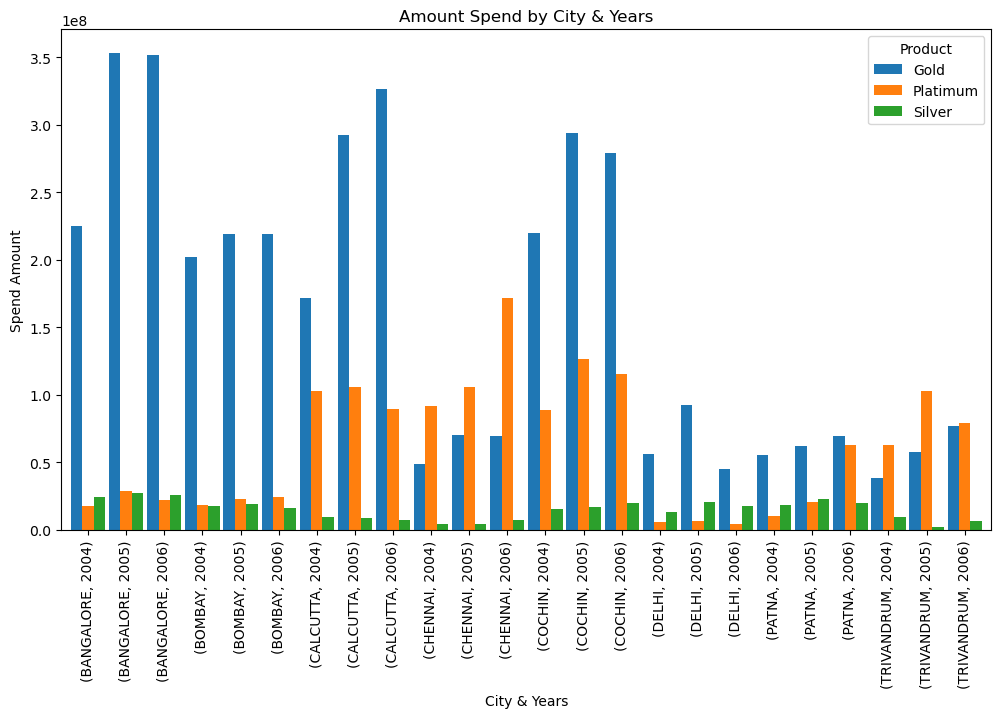

In [167]:
y.plot(kind = 'bar',figsize = (12,6.5),width = 0.9)
plt.title("Amount Spend by City & Years")
plt.xlabel("City & Years")
plt.ylabel("Spend Amount")
plt.savefig("C://projects/data.png")
plt.show()

In [169]:
#  4. Create graphs for
# a. Monthly comparison of total spends, city wise
# b. Comparison of yearly spend on air tickets
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [171]:
# Graph for Monthly comparison of total spends, city wise

In [173]:
#x = cust_spend.groupby(by = ['Month','City'])[['Amount']].sum().reset_index()

In [175]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])

C:\Users\hp\AppData\Local\Temp\ipykernel_25092\4133259070.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])


In [177]:
cust_spend['Month_name'] = cust_spend['Month'].dt.strftime("%B")
cust_spend['Year'] = cust_spend['Month'].dt.year

In [179]:
x = cust_spend.groupby(by = ['Month_name','City'])[['Amount']].sum().reset_index()
x

,Month_name,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [181]:
y = x.pivot_table(index = 'City', columns = ['Month_name'], values = 'Amount')
y

Month_name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


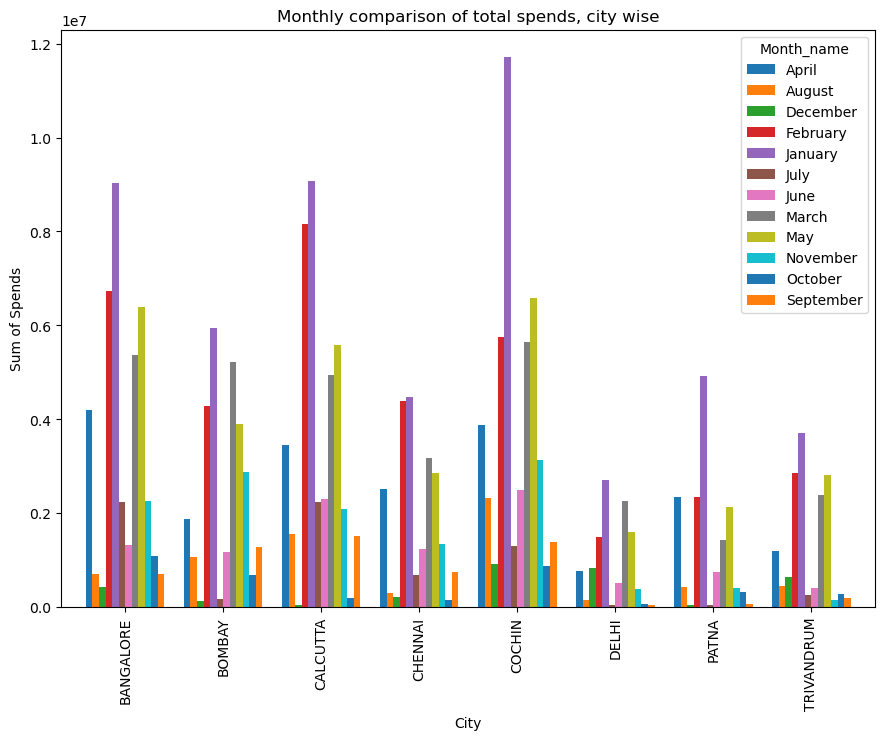

In [183]:
y.plot(kind = 'bar',figsize = (10.5,7.5),width = 0.8)
plt.title("Monthly comparison of total spends, city wise")
plt.xlabel("City")
plt.ylabel("Sum of Spends")
plt.savefig("C://projects/data4")
plt.show()

In [185]:
 # 4(b). Comparison of yearly spend on air tickets

In [209]:
a = cust_spend[(cust_spend['Type'] == 'AIR TICKET')]
a

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Month_name,Year
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,April,2006
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,275,2006-03-03,AIR TICKET,5001.00,March,2006
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,276,2006-04-03,AIR TICKET,50000.00,April,2006
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,277,2006-05-03,AIR TICKET,50000.50,May,2006
115,8,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,278,2006-06-03,AIR TICKET,50001.00,June,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,77,2005-02-23,AIR TICKET,50001.50,February,2005
1475,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,78,2005-02-03,AIR TICKET,30066.44,February,2005
1476,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,79,2006-02-04,AIR TICKET,31048.93,February,2006
1483,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,86,2006-03-27,AIR TICKET,50000.00,March,2006


In [211]:
a.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Month_name', 'Year'],
      dtype='object')

In [213]:
l = a.groupby(by = ['Type','Year'])[['Amount']].sum().reset_index()
l

,Type,Year,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56


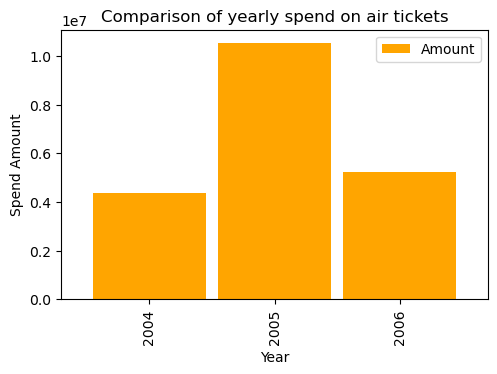

In [215]:
l.plot(kind = 'bar', x = 'Year',color = 'Orange',figsize = (5.5,3.5), width = 0.9)
plt.title("Comparison of yearly spend on air tickets")
plt.xlabel("Year")
plt.ylabel("Spend Amount")
plt.savefig("C://projects/data_year")
plt.show()

In [199]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [217]:
cust_spend.dtypes

No                     int64
Customer              object
Age                  float64
City                  object
Product               object
Limit                float64
Company               object
Segment               object
Sl No:                 int64
Month         datetime64[ns]
Type                  object
Amount               float64
Month_name            object
Year                   int32
dtype: object

In [219]:
x = cust_spend.groupby(by = ['Month_name','Product'])[['Amount']].sum().reset_index()

In [221]:
x

,Month_name,Product,Amount
0,April,Gold,13170572.59
1,April,Platimum,5182493.86
2,April,Silver,1902322.65
3,August,Gold,4954030.42
4,August,Platimum,1714762.80
5,August,Silver,293109.82
6,December,Gold,2332940.96
7,December,Platimum,750156.19
8,December,Silver,200537.90
9,February,Gold,24779179.55


In [233]:
y = x.pivot_table(index  = 'Product', columns = 'Month_name',values = 'Amount')
y

Month_name,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


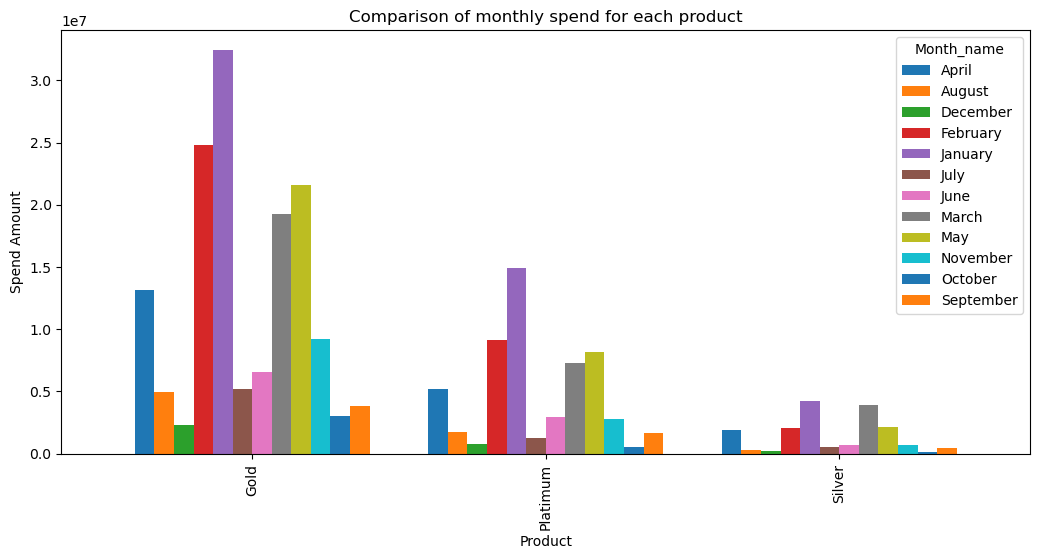

In [247]:
y.plot(kind = 'bar',figsize = (12.5,5.5), width = 0.8)
plt.title("Comparison of monthly spend for each product")
plt.xlabel("Product")
plt.ylabel("Spend Amount")
plt.savefig("C://projects/data5")
plt.show()

In [259]:
Customer['Product'].value_counts()

Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64

In [265]:
Repay_cust.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [271]:
Repay_cust.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
No            int64
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [273]:
Repay_cust['Month'] = pd.to_datetime(Repay_cust['Month'])

C:\Users\hp\AppData\Local\Temp\ipykernel_25092\3982113187.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Repay_cust['Month'] = pd.to_datetime(Repay_cust['Month'])


In [277]:
Repay_cust['Month_name'] = Repay_cust['Month'].dt.strftime('%B')
Repay_cust['Year'] = Repay_cust['Month'].dt.year

In [281]:
Repay_cust.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Month_name,Year
0,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005
4,6.0,A1,2005-02-23,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,February,2005


In [305]:
p = Repay_cust[(Repay_cust['Product'] == 'Gold')]
x = p.groupby(by = ['Month_name','Customer','Product','City'])[['Amount']].sum().reset_index()
y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Month_name',values = 'Amount')
y

Month_name                        April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Month_name                      January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        1912391.54   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        BOMBAY     A12       1220387.18  1201928.94  526225.8

In [321]:
def output(x,y):
    if x == 'Monthly' and y == 'Gold':
       p = Repay_cust[(Repay_cust['Product'] == 'Gold')]
       x = p.groupby(by = ['Month_name','Customer','Product','City'])[['Amount']].sum().reset_index()
       y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Month_name',values = 'Amount')
       return y
    elif x == 'Yearly' and y == 'Gold':
        p = Repay_cust[(Repay_cust['Product'] == 'Gold')]
        x = Repay_cust.groupby(by = ['Year','Customer','Product','City'])[['Amount']].sum().reset_index()
        y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Year', values = 'Amount')
        return y
    elif x == 'Monthly' and y == 'Platimum':
        p = Repay_cust[(Repay_cust['Product'] == 'Platimum')]
        x = p.groupby(by = ['Product','Customer','City','Month_name'])[['Amount']].sum().reset_index()
        y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Month_name', values = 'Amount')
        return y
    elif x == 'Yearly' and y == 'Platimum':
        p = Repay_cust[(Repay_cust['Product'] == 'Platimum')]
        x = p.groupby(by = ['Product','City','Year','Customer'])[['Amount']].sum().reset_index()
        y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Year', values = 'Amount')
        return y
    elif x == 'Monthly' and y =='Silver':
        p = Repay_cust[(Repay_cust['Product'] == 'Silver')]
        x = p.groupby(by = ['Product','City','Month_name','Customer'])[['Amount']].sum().reset_index()
        x.sort_values(by= ['Month_name'],ascending = True)
        y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Month_name', values = 'Amount')
        return y
    elif x == 'Yearly' and y == 'Silver':
        p = Repay_cust[(Repay_cust['Product'] == 'Silver')]
        x = p.groupby(by = ['Product','Customer','City','Year'])[['Amount']].sum().reset_index()
        y = x.pivot_table(index = ['Product','City','Customer'], columns = 'Year', values = 'Amount')
        return y  

In [323]:
output('Monthly','Silver')

Month_name                       April     August   December   February  \
Product City       Customer                                               
Silver  BANGALORE  A18       100000.00  100000.00        NaN   38296.41   
                   A23       405083.59  100001.00        NaN  472921.32   
                   A59        16652.72        NaN        NaN  200006.00   
                   A72             NaN        NaN        NaN  100000.00   
                   A76             NaN        NaN        NaN  265619.05   
                   A77             NaN        NaN        NaN    3159.62   
        BOMBAY     A22       392140.92  100000.00        NaN  349814.89   
                   A75             NaN        NaN        NaN  100003.00   
                   A80             NaN        NaN        NaN        NaN   
        CALCUTTA   A2        200000.00  100000.00        NaN  300000.00   
                   A58       200004.00        NaN        NaN  191585.97   
                   A73             NaN        NaN        NaN  100001.00   
                   A78             NaN        NaN        NaN        NaN   
                   A87             NaN        NaN        NaN        NaN   
        CHENNAI    A85             NaN        NaN        NaN        NaN   
                   A9         43323.90        NaN        NaN  266926.41   
                   A96             NaN        NaN        NaN        NaN   
        COCHIN     A100            NaN        NaN        NaN        NaN   
                   A25       300009.00    1168.46        NaN  236157.25   
                   A7              NaN        NaN  100001.00  100001.00   
                   A74             NaN        NaN        NaN  100002.00   
                   A79             NaN        NaN        NaN        NaN   
        DELHI      A24       222060.59  100002.00  100002.00  286593.13   
                   A6              NaN        NaN   27398.18  100000.00   
        PATNA      A46       327793.48        NaN        NaN  544231.79   
                   A8        100002.00        NaN        NaN  300006.00   
                   A84             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57       177378.57        NaN  100001.00  200002.00   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   

Month_name                     January      July       June      March  \
Product City       Customer                                              
Silver  BANGALORE  A18       391592.71       NaN  200000.00  600000.00   
                   A23       459884.12  100001.0        NaN  100001.00   
                   A59       476551.50  100003.0  110585.36  400012.00   
                   A72             NaN       NaN        NaN        NaN   
                   A76             NaN       NaN        NaN        NaN   
                   A77             NaN       NaN        NaN        NaN   
        BOMBAY     A22       900000.00  100000.0  100000.00  253130.91   
                   A75             NaN       NaN        NaN        NaN   
                   A80             NaN       NaN        NaN  481205.64   
        CALCUTTA   A2        200000.00       NaN        NaN        NaN   
                   A58       333811.62       NaN  100002.00  408754.94   
                   A73             NaN       NaN        NaN        NaN   
                   A78             NaN       NaN        NaN   55344.81   
                   A87             NaN       NaN        NaN  100003.00   
        CHENNAI    A85             NaN       NaN        NaN  100001.00   
                   A9        380193.34       NaN        NaN  400012.00   
                   A96       100000.00       NaN        NaN        NaN   
        COCHIN     A100       69551.19       NaN        NaN        NaN   
                   A25       586332.08  100003.0        NaN  300009.00   
                   A7        594009.28       

In [327]:
output('Monthly','Gold')

Month_name                        April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Month_name                      January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        1912391.54   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        BOMBAY     A12       1220387.18  1201928.94  526225.8

In [329]:
output('Monthly','Platimum')

Month_name                         April     August   December    February  \
Product  City       Customer                                                 
Platimum BANGALORE  A19         30000.00        NaN   10000.00    10000.00   
                    A37        255805.86  100003.00  100003.00   404735.41   
                    A5           7276.60        NaN        NaN    10002.00   
                    A52        200004.00  235509.11        NaN   234334.70   
         BOMBAY     A33              NaN   10002.00        NaN    30006.00   
                    A36        511685.20  117379.12  100002.00   427759.59   
                    A4          10001.00        NaN   10001.00    20002.00   
                    A51        100001.00        NaN        NaN   206147.92   
                    A70              NaN   10001.00        NaN    10001.00   
                    A71              NaN        NaN        NaN    10002.00   
         CALCUTTA   A20         40004.00   10001.00        NaN    20002.00   
                    A34        100000.00  200000.00        NaN   198933.36   
                    A40              NaN  488742.81  169786.15   937643.24   
                    A49         30006.00   10002.00   10002.00    70014.00   
                    A69              NaN        NaN        NaN         NaN   
                    A98              NaN        NaN        NaN         NaN   
                    A99              NaN        NaN        NaN         NaN   
         CHENNAI    A38        369151.51        NaN  492660.82  1365681.76   
                    A47         50000.00        NaN        NaN    80000.00   
                    A56        770261.09        NaN  162103.09   413912.92   
         COCHIN     A21         40008.00   30006.00   10002.00    50010.00   
                    A3          20000.00        NaN        NaN    30000.00   
                    A35        200002.00  130191.67        NaN   300003.00   
                    A41        147383.00    6865.68        NaN   509624.20   
                    A50        100000.00  100000.00        NaN   229753.02   
                    A54       1025491.68        NaN  215719.14  1149119.64   
                    A83              NaN        NaN        NaN         NaN   
         DELHI      A53        300009.00   50308.75  100003.00   279929.09   
         PATNA      A55        619774.41        NaN        NaN  1124130.33   
         TRIVANDRUM A39        472407.74        NaN  278687.47  1212860.65   
                    A48         50005.00        NaN        NaN    70007.00   
                    A97              NaN        NaN        NaN         NaN   

Month_name                       January       July       June       March  \
Product  City       Customer                                                 
Platimum BANGALORE  A19         50000.00   10000.00   10000.00    40000.00   
                    A37        500008.58        NaN  200006.00   200006.00   
                    A5          60012.00        NaN        NaN    30006.00   
                    A52        263853.18  100002.00        NaN   300006.00   
         BOMBAY     A33              NaN   20004.00   10002.00    30006.00   
                    A36        400008.00  100002.00  100002.00   100002.00   
                    A4          20002.00        NaN        NaN    10001.00   
                    A51        282084.48  300003.00  100001.00   167366.29   
                    A70              NaN        NaN        NaN         NaN   
                    A71              NaN        NaN        NaN         NaN   
         CALCUTTA   A20         50005.00   30003.00        NaN    30003.00   
                    A34              NaN  148053.83  100000.00   128854.14   
                    A40       1749083.51  242107.49        NaN  1176947.70   
                    A49         50010.00   10002.00   30006.00    30006.00   
                    A69         10000.00   10000.00        NaN         NaN   
                    A

In [338]:
output('Monthly','Silver')

Month_name                       April     August   December   February  \
Product City       Customer                                               
Silver  BANGALORE  A18       100000.00  100000.00        NaN   38296.41   
                   A23       405083.59  100001.00        NaN  472921.32   
                   A59        16652.72        NaN        NaN  200006.00   
                   A72             NaN        NaN        NaN  100000.00   
                   A76             NaN        NaN        NaN  265619.05   
                   A77             NaN        NaN        NaN    3159.62   
        BOMBAY     A22       392140.92  100000.00        NaN  349814.89   
                   A75             NaN        NaN        NaN  100003.00   
                   A80             NaN        NaN        NaN        NaN   
        CALCUTTA   A2        200000.00  100000.00        NaN  300000.00   
                   A58       200004.00        NaN        NaN  191585.97   
                   A73             NaN        NaN        NaN  100001.00   
                   A78             NaN        NaN        NaN        NaN   
                   A87             NaN        NaN        NaN        NaN   
        CHENNAI    A85             NaN        NaN        NaN        NaN   
                   A9         43323.90        NaN        NaN  266926.41   
                   A96             NaN        NaN        NaN        NaN   
        COCHIN     A100            NaN        NaN        NaN        NaN   
                   A25       300009.00    1168.46        NaN  236157.25   
                   A7              NaN        NaN  100001.00  100001.00   
                   A74             NaN        NaN        NaN  100002.00   
                   A79             NaN        NaN        NaN        NaN   
        DELHI      A24       222060.59  100002.00  100002.00  286593.13   
                   A6              NaN        NaN   27398.18  100000.00   
        PATNA      A46       327793.48        NaN        NaN  544231.79   
                   A8        100002.00        NaN        NaN  300006.00   
                   A84             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57       177378.57        NaN  100001.00  200002.00   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   

Month_name                     January      July       June      March  \
Product City       Customer                                              
Silver  BANGALORE  A18       391592.71       NaN  200000.00  600000.00   
                   A23       459884.12  100001.0        NaN  100001.00   
                   A59       476551.50  100003.0  110585.36  400012.00   
                   A72             NaN       NaN        NaN        NaN   
                   A76             NaN       NaN        NaN        NaN   
                   A77             NaN       NaN        NaN        NaN   
        BOMBAY     A22       900000.00  100000.0  100000.00  253130.91   
                   A75             NaN       NaN        NaN        NaN   
                   A80             NaN       NaN        NaN  481205.64   
        CALCUTTA   A2        200000.00       NaN        NaN        NaN   
                   A58       333811.62       NaN  100002.00  408754.94   
                   A73             NaN       NaN        NaN        NaN   
                   A78             NaN       NaN        NaN   55344.81   
                   A87             NaN       NaN        NaN  100003.00   
        CHENNAI    A85             NaN       NaN        NaN  100001.00   
                   A9        380193.34       NaN        NaN  400012.00   
                   A96       100000.00       NaN        NaN        NaN   
        COCHIN     A100       69551.19       NaN        NaN        NaN   
                   A25       586332.08  100003.0        NaN  300009.00   
                   A7        594009.28       

In [331]:
output('Yearly','Silver')

Year                               2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00

In [333]:
output('Yearly','Gold')

Year                               2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        1864383.09  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
...                                 ...         ...         ...
Silver  PATNA      A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00

[100 rows x 3 columns]

In [335]:
output('Yearly','Platimum')

Year                                2004        2005        2006
Product  City       Customer                                    
Platimum BANGALORE  A19         50000.00    70000.00    80000.00
                    A37        770552.62  1031641.04   893364.91
                    A5          68809.07    57286.60    40008.00
                    A52        263853.18   769849.81   600012.00
         BOMBAY     A33         12275.98    40008.00    80016.00
                    A36        772335.72   856921.95  1100022.00
                    A4          30003.00    40004.00    40004.00
                    A51        423029.79   459351.63   526425.98
                    A70              NaN    20002.00         NaN
                    A71         10002.00    10002.00         NaN
         CALCUTTA   A20         70007.00    60006.00    70007.00
                    A34         81344.52   372832.64   676907.97
                    A40       2576916.73  2527720.55  1886111.99
                    A49        100020.00   130026.00    80016.00
                    A69              NaN    10000.00    10000.00
                    A98         10001.00         NaN         NaN
                    A99         10002.00         NaN         NaN
         CHENNAI    A38       1951311.01  2408626.65  3111018.69
                    A47         60000.00   160000.00    90000.00
                    A56         36537.90   966666.69  3295868.87
         COCHIN     A21        110022.00   140028.00    80016.00
                    A3          30000.00    50000.00    30000.00
                    A35         31811.80   430194.67   800008.00
                    A41       1752953.17  2486187.34  1241458.03
                    A50        325086.07   338057.45   900000.00
                    A54        490081.00  1829813.48  3255687.64
                    A83              NaN         NaN    10002.00
         DELHI      A53        440318.31   679941.09   450320.75
         PATNA      A55        335081.18   708035.12  2874384.90
         TRIVANDRUM A39       1342503.16  3699578.97  2580401.17
                    A48         70007.00   140014.00   100010.00
                    A97         10000.00         NaN         NaN

###                                        ---- END OF THE NOTEBOOK---